# Funding Agencies

In [1]:
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
import operator
import re
import seaborn as sns

In [2]:
sns.set()

In [3]:
addressBook = {"serializedData" : "./SerializedData/"}

In [4]:
allPapers = pk.loads(open(addressBook["serializedData"]+"allPapers.dic", "rb").read())
annualPapers = pk.loads(open(addressBook["serializedData"]+"annualPapers.dic", "rb").read())

In [5]:
cleaningDict = {"NSF":"National Science Foundation", 
               "NSFC":"National Natural Science Foundation of China",
               "ESRC":"Economic and Social Research Council",
               "National Science Foundation (NSF)":"National Science Foundation",
               "U.S. National Science Foundation":"National Science Foundation",
               "EU":"European Union",
               "NIH":"National Institutes of Health",
               "ERC":"European Research Council",
               "Natural Science Foundation of China":"National Natural Science Foundation of China"
               }

In [6]:
patt = re.compile('\[.*]')
for doi, paper in allPapers.items():
    agencies = [patt.sub("",agc).replace('"','').strip() for agc in paper["FU"].split(";") if (paper["FU"] != '' and paper["FU"] != ' ')]
    newAgencies = []
    for agc in agencies:
        if agc in cleaningDict:
#             print(True)
            newAgencies.append(cleaningDict[agc])
        else:
            newAgencies.append(agc)
    paper["FU"] = newAgencies
    if "NSFC" in newAgencies:
        print(True)

In [7]:
patt = re.compile('\[.*]')
for year, papers in annualPapers.items():
    for doi, paper in papers.items():
        agencies = [patt.sub("",agc).replace('"','').strip() for agc in paper["FU"].split(";") if (paper["FU"] != '' and paper["FU"] != ' ')]
        newAgencies = []
        for agc in agencies:
            if agc in cleaningDict:
                newAgencies.append(cleaningDict[agc])
            else:
                newAgencies.append(agc)
        paper["FU"] = newAgencies

In [8]:
yearlyFundings = {}
for year, papers in annualPapers.items():
    yearlyFundings[year] = 0
    for doi,paper in papers.items():
        yearlyFundings[year]+=len(paper["FU"])

In [9]:
yearlyFundingsDataFrame = pd.DataFrame({"Year":[int(y) for y in yearlyFundings.keys()],"Number of Funding Agencies":[n for n in yearlyFundings.values()]})
yearlyFundingsDataFrame = yearlyFundingsDataFrame.drop([78], axis='index')

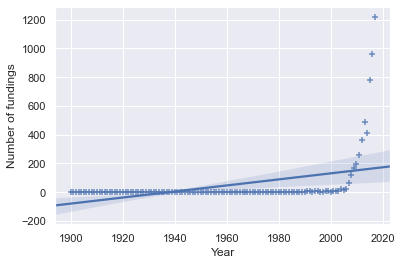

In [10]:
x=yearlyFundingsDataFrame["Year"]
y=yearlyFundingsDataFrame["Number of Funding Agencies"]

sns_plot = sns.regplot(x, y, marker="+", color="b", truncate=False, x_jitter=.1, order=1)
plt.ylabel("Number of fundings")

fig = sns_plot.get_figure()

In [11]:
allFunds = {}

for doi, paper in allPapers.items():
    if len(paper["FU"]) > 0:
        for fund in paper["FU"]:
            if fund in allFunds.keys():
                allFunds[fund] += 1
            else:
                allFunds[fund] = 1

In [12]:
funds = {}

for year, papers in annualPapers.items():
    funds[year] = {}
    for doi, paper in papers.items():
        if len(paper["FU"]) > 0:
            for fund in paper["FU"]:
                if fund in funds[year].keys():
                    funds[year][fund] += 1
                else:
                    funds[year][fund] = 1

In [13]:
fundsYearlyCount = {}
for year, fund in funds.items():
    fundsYearlyCount[year] = len(fund)

In [14]:
fundsYearlyCountDataFrame = pd.DataFrame({"Year":[int(y) for y in fundsYearlyCount.keys()],"Variety of Funding Agencies":[v for v in fundsYearlyCount.values()]})

In [15]:
fundsYearlyCountDataFrame = fundsYearlyCountDataFrame.drop([78], axis='index')

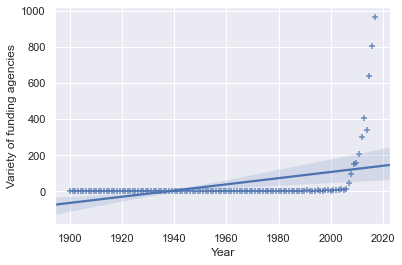

In [16]:
x=fundsYearlyCountDataFrame["Year"]
y=fundsYearlyCountDataFrame["Variety of Funding Agencies"]

sns_plot = sns.regplot(x, y, marker="+", color="b", truncate=False, x_jitter=.1, order=1)
plt.ylabel("Variety of funding agencies")

fig = sns_plot.get_figure()

In [17]:
sortedAllFundsVariety = sorted(allFunds.items(), key=operator.itemgetter(1),reverse=True)

In [18]:
sortedAllFundsVarietyDataFrame = pd.DataFrame({"Funding Agency":[f[0] for f in sortedAllFundsVariety],"Number of Fundings":[int(n[1]) for n in sortedAllFundsVariety]})

In [19]:
sortedAllFundsVarietyDataFrame =sortedAllFundsVarietyDataFrame.drop([7])

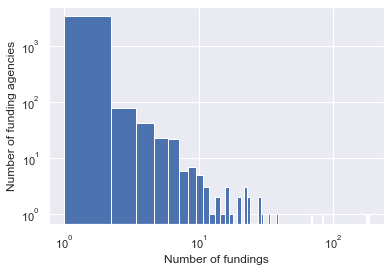

In [21]:
sortedAllFundsVarietyDataFrame.plot.hist(bins=150, legend=False, loglog=True)
plt.xlabel("Number of fundings")
plt.ylabel("Number of funding agencies")
plt.show()